In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mimer = '/mimer/NOBACKUP/groups/globalpoverty1/albin_and_albin/metric_summary/'
fold_config = '12345'

# single year
metrics_csv_path_longformat_singleyear = mimer + f'landcover_prediction_esri_singleyear_{fold_config}_yearly_longformat.csv'

df_singleyear = pd.read_csv(metrics_csv_path_longformat_singleyear)
df_singleyear

,year,modeltype,metric,class,value
0,2018,singleyear,recall,c1:Water,0.945440
1,2018,singleyear,recall,c2:Tree,0.871604
2,2018,singleyear,recall,c3:Flooded Vegetation,0.895139
3,2018,singleyear,recall,c4:Crops,0.823276
4,2018,singleyear,recall,c5:Bare Ground,0.881027
...,...,...,...,...,...
155,2022,singleyear,f1,c4:Crops,0.667050
156,2022,singleyear,f1,c5:Bare Ground,0.872257
157,2022,singleyear,f1,c6:Rangeland,0.872934
158,2022,singleyear,f1,c7:Rural,0.291831


In [6]:
# multi year
metrics_csv_path_longformat_multiyear = mimer + f'landcover_prediction_esri_multiyear_{fold_config}_yearly_longformat.csv'

df_multiyear = pd.read_csv(metrics_csv_path_longformat_multiyear)
#df_multiyear[df_multiyear['metric'] == 'recall']
df_multiyear

,year,modeltype,metric,class,value
0,2018,multiyear,recall,c1:Water,0.946985
1,2018,multiyear,recall,c2:Tree,0.922055
2,2018,multiyear,recall,c3:Flooded Vegetation,0.918272
3,2018,multiyear,recall,c4:Crops,0.683428
4,2018,multiyear,recall,c5:Bare Ground,0.772129
...,...,...,...,...,...
155,2022,multiyear,f1,c4:Crops,0.684935
156,2022,multiyear,f1,c5:Bare Ground,0.864520
157,2022,multiyear,f1,c6:Rangeland,0.855287
158,2022,multiyear,f1,c7:Rural,0.247956


In [7]:
# join
df_comp = df_singleyear.append(df_multiyear, ignore_index=True)
df_comp['year'] = df_comp['year'].astype('string')
df_comp

/tmp/ipykernel_1015571/2775701554.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comp = df_singleyear.append(df_multiyear, ignore_index=True)


,year,modeltype,metric,class,value
0,2018,singleyear,recall,c1:Water,0.945440
1,2018,singleyear,recall,c2:Tree,0.871604
2,2018,singleyear,recall,c3:Flooded Vegetation,0.895139
3,2018,singleyear,recall,c4:Crops,0.823276
4,2018,singleyear,recall,c5:Bare Ground,0.881027
...,...,...,...,...,...
315,2022,multiyear,f1,c4:Crops,0.684935
316,2022,multiyear,f1,c5:Bare Ground,0.864520
317,2022,multiyear,f1,c6:Rangeland,0.855287
318,2022,multiyear,f1,c7:Rural,0.247956


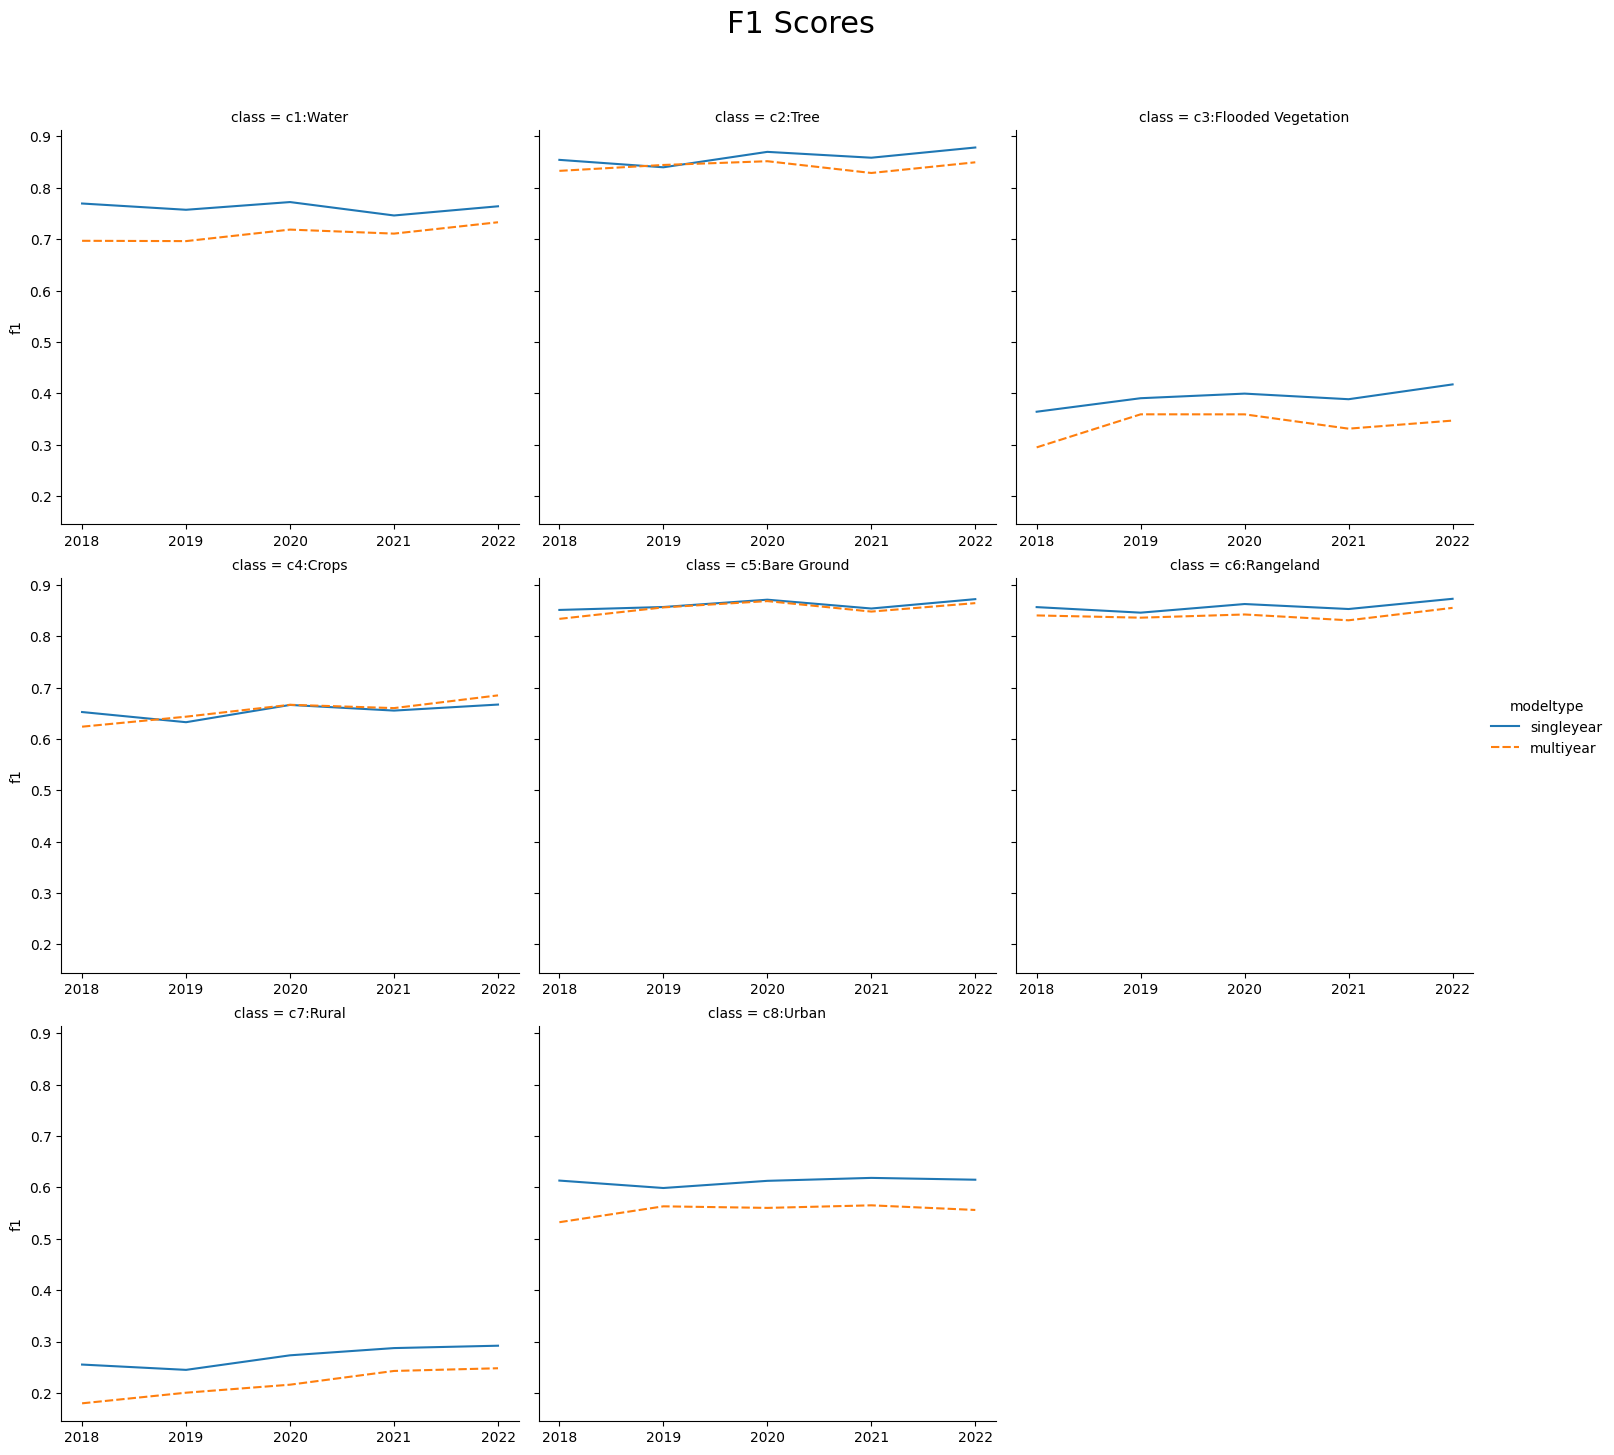

In [11]:
metric = 'f1'
g = sns.relplot(
    data=df_comp[df_comp['metric'] == metric], x="year", y="value",
    col="class", hue="modeltype", style="modeltype",
    kind="line", col_wrap=3
)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle(f'{metric.capitalize()} Scores', fontsize=22)

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.set_axis_labels('', metric)
